## Michał Kowalik

## L2a

## Ćwiczenie 8 (2 pkt)

Napisać funkcję, która przyjmuje parametry rozkładu normalnego: średnią oraz macierz kowariancji, liczbę sampli, a następnie sampluje punkty z tego rozkładu i rysuje na plaszczyźnie. Ponadto na rysunku należy zaznaczyć strzałkami wektory własne macierzy kowariancji (punkt zaczepienia to średnia rozkładu normalnego) i wypisać odpowiadające im wartości własne.

Narysować powyższe dla kilku różnych losowo wybranych średnich i macierzy kowariancji (http://stackoverflow.com/questions/619335/a-simple-algorithm-for-generating-positive-semidefinite-matrices).


In [3]:
import numpy as np
import matplotlib.pylab as plt # Import podpakietu jako plt
# Magia IPython Notebook :) Pokazuje wykresy w konsoli
%matplotlib inline 
import random

[ 1.11097722  0.18902278]


(-2, 6)

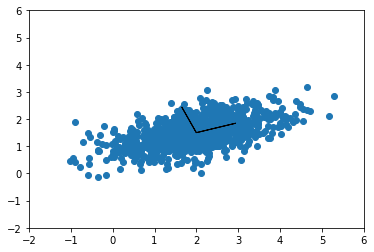

In [4]:
mean = [2.0, 1.5]
cov = [[1.0, 0.3], [0.3, 0.3]]
size = 1000
samples = np.random.multivariate_normal(mean, cov, size=size)
# eigenvalues, eigenvectors = np.linalg.eig(cov)
w, v = np.linalg.eig(cov)

plt.scatter(samples[:, 0], samples[:, 1])

plt.arrow(mean[0], mean[1], v[0][0], v[1][0])
plt.arrow(mean[0], mean[1], v[0][1], v[1][1])
print w
# plt.arrow(mean[0], mean[1], v[0], v[1])

plt.xlim(-2, 6)
plt.ylim(-2, 6)
# wynik: spodziewamy się elipsy o środku w średniej rozkładu,
# tam też powinna być największa gęstość samplowanych punktów;
# wektory własne powinny wskazywać kierunki osi elipsy;
# jaki jest związek wartości własnych z długościami osi elipsy?

## Ćwiczenie 9 (4 pkt)

Załóżmy, że mamy dane pochodzące dwuwymiarowego rozkładu normalnego o macierzy kowariancji będącej identycznością i średniej $\mu$. Będziemy estymowali $\mu$ korzystając z wzoru Bayesa.

1. Stworzyć siatkę 100x100 na kwadracie $[0,1]^2$ - to będą nasze potencjalne średnie.
2. Wylosować jeden punkt z siatki - to będzie "prawdziwa" średnia rozkładu. Oczywiście model jej nie zna.
3. Przyjąć jednostajny rozkład a priori (użyć floatów z największą możliwą precyzją), trzymać go w tablicy knowledge.
4. Powtórzyć nb_iters razy:
    - wygenerować nb_samples sampli z prawdziwego rozkładu,
    - uaktualnić knowledge na podstawie obserwacji,
    - narysować knowledge jako dwuwymiarowy heatmap.

Sprawdzić, co się stanie, gdy:
1. Siatka punktów będzie rzadsza, a prawdziwa średnia rozkładu będzie poza siatką.
2. Średnia rozkładu znajdzie się całkowicie poza badanym kwadratem, np. w punkcie $(1.2, 0.7)$.
3. Na początku wylosujemy 2 punkty z siatki - $\mu_1$ i $\mu_2$ - a następnie obserwacje będziemy samplować naprzemian z dwóch rozkładów gaussa, przy czym cały czas estymujemy $\mu$ tak, jak gdyby istniało dokładnie jedno prawdziwe.

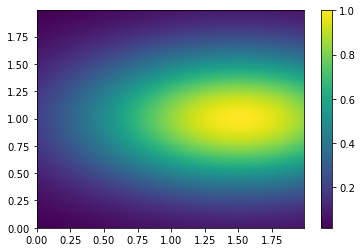

In [19]:
from mpl_toolkits.mplot3d import Axes3D

cov_matrix = np.array([[0.2, 0.0], [0.0, 0.7]])
mean       = np.array([1.0, 1.5]).reshape(-1, 1)
size       = 200
knowledge  = np.ones((size, size))
nb_iters   = 1
nb_samples = 1000
        
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

def density(mean, cov, point):
    sigm_inv = np.linalg.inv(cov)
    diff_x   = np.array(point).reshape(-1,1) - mean
    norm     = np.linalg.norm(cov)
    return np.exp(-0.5 * diff_x.transpose().dot(sigm_inv).dot(diff_x))[0][0]

xx = []
yy = []

for _ in xrange(nb_iters):
    samples = np.random.multivariate_normal(mean.ravel(), cov_matrix, nb_samples)
    # plt.scatter(samples[:, 0], samples[:, 1])
    
    for u_y, y in [(x/100.0, x) for x in xrange(0, size, 1)]:
        x_temp = []
        y_temp = []
        
        for u_x, x in [(x/100.0, x) for x in xrange(0, size, 1)]:
            knowledge[y, x] = knowledge[y, x] * density(mean, cov_matrix, [u_y, u_x])
            y_temp.append(u_y)
            x_temp.append(u_x)
            
        xx.append(x_temp)
        yy.append(y_temp)
        
xx = np.array(xx)
yy = np.array(yy)
            
plt.pcolormesh(xx, yy, knowledge)
plt.colorbar() 
plt.show() 

## Ćwiczenie 10 (4 pkt)
(proszę najpierw przeczytać uwagę dodaną na czerwono w sekcji "Podejście maximum likelihood")

Zdarzenie oznaczone $B_1$: Rzucamy dziesięć razy monetą i otrzymujemy wyniki ORZEŁ, ORZEŁ, RESZKA, RESZKA, ORZEŁ, RESZKA, ORZEŁ, ORZEŁ, ORZEŁ, ORZEŁ.

Zdarzenie oznaczone $B_2$: Poprosiliśmy kolegę, żeby w naszym imieniu rzucił 10 razy monetą i zanotował wyniki. Kolega - w dobrej wierze - zliczał tylko liczbę orłów, wypadło ich 7.

Udowodnić (matematycznie), że dla dowolnego rozkładu a priori parametru $\theta$ zachodzi równość rozkładów a posteriori:
$$P(\theta\mid B_1) = P(\theta\mid B_2)$$
Innymi słowy, kolejność wyników rzutu monetą faktycznie nie niesie za sobą żadnej informacji, która jest przydatna przy estymowaniu parametru $\theta$.

$$ P(\hat{\theta} | B_1) = 
\frac{P(B_1|\hat{\theta}) P(\hat{\theta})}{P(B_1)} = 
\frac{\hat{\theta}^7(1-\hat{\theta})^3 \cdot P(\hat{\theta})}{\sum\limits_{\theta} \theta^7(1-\theta)^3 \cdot P(\theta)}
$$

$$ P(\hat{\theta} | B_2) =
\frac{P(B_2|\hat{\theta}) P(\hat{\theta})}{P(B_2)} = 
\frac{{10\choose 7} \hat{\theta}^7(1-\hat{\theta})^3 \cdot P(\hat{\theta})}{\sum\limits_{\theta} {10\choose 7} \theta^7(1-\theta)^3 \cdot P(\theta)} = 
\frac{{10\choose 7} \hat{\theta}^7(1-\hat{\theta})^3 \cdot P(\hat{\theta})}{ {10\choose 7} \sum\limits_{\theta} \theta^7(1-\theta)^3 \cdot P(\theta)} = 
\frac{\hat{\theta}^7(1-\hat{\theta})^3 \cdot P(\hat{\theta})}{\sum\limits_{\theta} \theta^7(1-\theta)^3 \cdot P(\theta)}
$$

$$ P(\hat{\theta} | B_1) = P(\hat{\theta} | B_2) $$

## L2b

## Cwiczenie 1 (1 pkt)

Dane pochodzą z rozkładu y_i = m*x_i + b + N(0, 1). Dla zadanego zbioru policz log-likelihood danych dla m=2.0 i b=0.1, gdzie loglikelihood =  $log \prod_i p(y_i | m, x_i) = \sum log p(y_i | m, x_i)$

Log likelihood:  -231.545040364


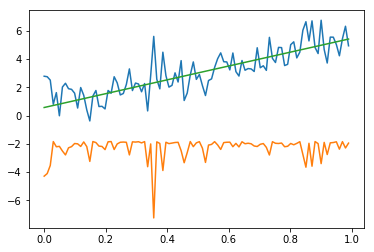

In [11]:
## Syntetyczny zbiór danych
np.random.seed(123456789)

def y(x,m,b,mu=0,sigma=1): 
    return m*x + b + np.random.normal(mu,sigma,1)[0]

N = 101
M = 2
t = np.empty(N)
domain_bound = 1.0/N
domain = np.empty(N)

for i in range(N): 
    domain[i] = i*domain_bound
    
for i in range(N): 
    t[i] = y(x=domain[i],m=4.89,b=0.57)


def logp(y_i, m, b, sigma, x_i):
    y_prop = m*x_i + b
#   p      = np.log(exp((-(y_i - y_prop)**2.0)/(2.0 ** sigma ** 2.0)) / np.sqrt(2 * sigma**2.0 * np.pi))
    p      = - np.log(2*np.pi) - np.log(sigma ** 2.0) - (1/(2.0 * (sigma**2.0))) * ((y_i - y_prop)**2.0)
    return p

llh = []
for d_i, y_i in zip(domain, t):
    llh.append(logp(y_i, 4.89, 0.57, 1.0, d_i))

_ = plt.plot(domain,t, domain, llh, domain, y(domain, 4.89, 0.57, mu=0, sigma=0.0001))

print "Log likelihood: ", np.sum(llh)

    

## Ćwiczenie 2 (1 pkt)

Napisać funkcję, która przyjmuje dwuwymiarową dodatnio określoną macierz $A$, a następnie:
1. Rysuje heatmap dla $v^TAv$.
2. Na tym samym wykresie:
    - rysuje okrąg jednostkowy,
    - rysuje elipsę jednostkową dla $A$,
    - rysuje elipsę jednostkową dla $A^{-1}$.

Jedyną trudność może sprawić narysowanie elipsy jednostkowej. Proponuję zrobić to w następujący sposób:
1. Zacząć od listy wektorów na okręgu jednostkowym - punkty postaci $(\cos(\alpha), \sin(\alpha))$, gdzie $\alpha$ są rozmieszczone równomiernie na odcinku $[0,2\pi)$.
2. Dla każdego wektora $v$ liczymy $\|v\|^2 = v^TAv$ - chcielibyśmy, żeby $\|v\| = 1$, więc w tym celu wystarczy zastąpić $v$ przez $\frac{v}{\sqrt{v^TAv}}$.
3. Mamy listę kolejnych punktów leżących na elipsie jednostkowej macierzy $A$, rysujemy je i łączymy odcinkami.

Oczywiście najwygodniej będzie stworzyć funkcję pomocniczą draw_ellipse, której podamy kolejno macierz identycznościową (aby uzyskać okrąg), macierz $A$ i $A^{-1}$.

(400L, 400L)
(400L, 400L)
(400L, 400L)
[[ 1.    0.  ]
 [ 0.    0.25]]


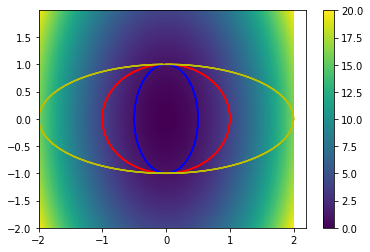

In [13]:
# Spodziewany efekt - albo mała elipsa wewnątrz okręgu wewnątrz dużej elipsy,
# albo duża i mała elipsa przecinają się dokładnie na okręgu

yy = []
xx = []
norm = []

A = np.array([[1.0, 0.0],
              [0.0, 4.0]])

for y in [(y/100.0-2.0) for y in range(0, 400)]:
    y_temp = []
    x_temp = []
    norm_temp = []
    
    for x in [(x/100.0-2.0) for x in range(0, 400)]: # range from -2.0 to 2.0
        v = np.array([[y], 
                      [x]])
        norm_temp.append((v.transpose().dot(A).dot(v))[0][0])
        
        x_temp.append(x)
        y_temp.append(y)
    
    yy.append(y_temp)
    xx.append(x_temp)
    norm.append(norm_temp)
    
xx   = np.array(xx)
yy   = np.array(yy)
norm = np.array(norm)

print xx.shape
print yy.shape
print norm.shape
    
plt.pcolormesh(xx, yy, norm)
plt.colorbar() 

def draw_elipse(MyA, color):
    
    y_elipse = []
    x_elipse = []
    
    for alpha in [(x*2.0*np.pi)/100.0 for x in range(0, 200)]:
        y_i = np.cos(alpha)
        x_i = np.sin(alpha)
        
        v_i = np.array([[y_i], 
                        [x_i]])
        
        norm_i = ((v_i.transpose().dot(MyA).dot(v_i))[0][0])
        v_i = v_i/np.sqrt(norm_i)
        
        y_elipse.append(v_i[0])
        x_elipse.append(v_i[1])
        
    plt.plot(x_elipse, y_elipse, color)
    
draw_elipse([[1,0],[0,1]], 'r-')
draw_elipse(A, 'b-')
print np.linalg.inv(A)
draw_elipse(np.linalg.inv(A), 'y-')
        

plt.show() 
    

## Ćwiczenie 2 (1 pkt)

Wylosować 1000 punktów z dwuwymiarowego rozkładu normalnego o losowej macierzy $\Sigma$. Następnie wyestymować kowariancje z próbki i porównać z macierzą kowariancji.

In [15]:
# Spodziewany wynik - powinno wyjść prawie to samo

sigma_org = [[1.2, 0.8], [0.6, 4.2]]
mean_org = np.random.rand(2, 1)

N = 1000

points = np.random.multivariate_normal(mean_org.ravel(), sigma_org, N)
mean = np.mean(points, axis=0).reshape(2, 1)
print "Orginal mean:\n", mean_org
print "Estimated mean:\n", mean


sum = [[0.0, 0.0], [0.0, 0.0]]

for point in points:
    point = np.array(point).reshape(2, 1)
    sum += (point - mean).dot((point - mean).transpose())
    
sum /= (float(N-1))

print 
print "Orginal sigma:\n", np.array(sigma_org)
print "Estimated sigma:\n", sum


Orginal mean:
[[ 0.03665665]
 [ 0.7239827 ]]
Estimated mean:
[[ 0.03933406]
 [ 0.62873964]]

Orginal sigma:
[[ 1.2  0.8]
 [ 0.6  4.2]]
Estimated sigma:
[[ 1.16541223  0.74704728]
 [ 0.74704728  4.27619056]]


## Ćwiczenie 3 (1 pkt)

[Nieobowiazkowe w grupie S.J.] Wylosować dwie serie po 1000 punktów z dwóch różnych jednowymiarowych rozkładów Gaussa. Narysować histogramy. Następnie umieścić wyniki w tabeli 1000 na 2 i narysować rozkład produktowy (zaznaczyć wylosowane pary punktów na płaszczyźnie).

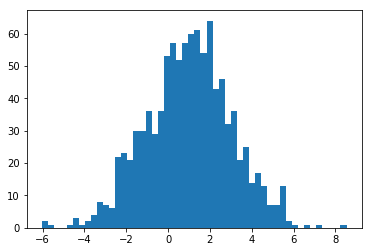

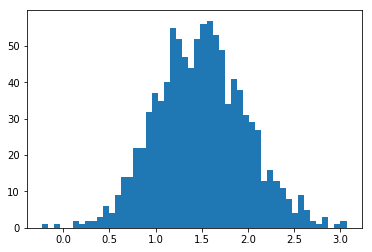

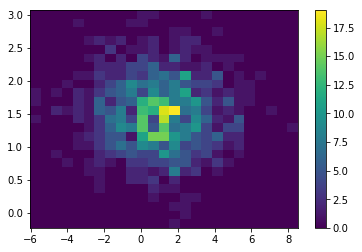

In [17]:
# spodziewany wynik - elipsa o osiach ustawionych równolegle do osi układu współrzędnych

normal1 = np.random.normal(1.0, 2.0, 1000)
normal2 = np.random.normal(1.5, 0.5, 1000)

plt.hist(normal1, 50)
plt.show()

plt.hist(normal2, 50)
plt.show()

normal2d = np.array([normal1, normal2]).transpose()

plt.hist2d(normal2d[:, 0], normal2d[:, 1], bins=25)
plt.colorbar()
plt.show()


## Ćwiczenie 7 (1 pkt)

"Udowodnić" powyższe twierdzenie w następujący sposób:
1. Wylosować $k$ serii po 1000 punktów z rozkładu jednostajnego na odcinku $[0,1]$.
2. Zsumować te rozkłady.
3. Narysować histogramy sumy np. dla $k = 1, 2, 3, 5, 10$.
4. (Dla odważnych) Zamiast sumy zastosować poprawny wzór z Wikipedii (od każdego rozkładu odjąć średnią, uśrednić arytmetycznie zamiast sumować, przypomnieć sobie wzór na $\sigma$ rozkładu jednostajnego na odcinku, podzielić przez $\frac{\sigma}{\sqrt{n}}$).

(1000L,)


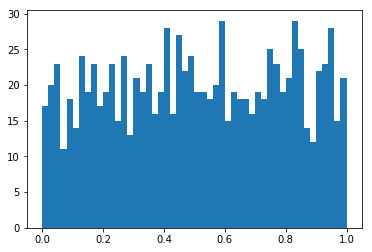

(2000L,)


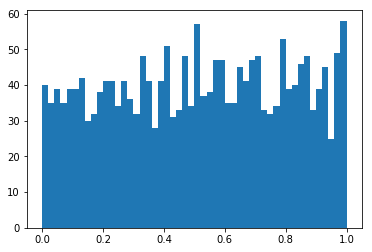

(3000L,)


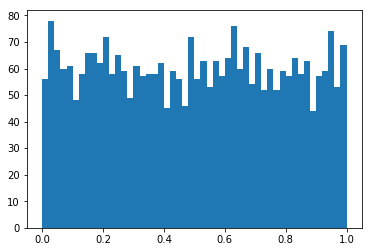

(5000L,)


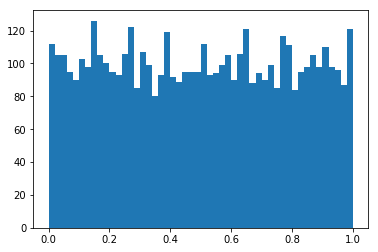

(10000L,)


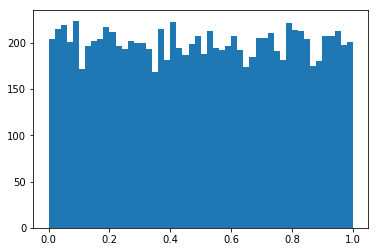

(50000L,)


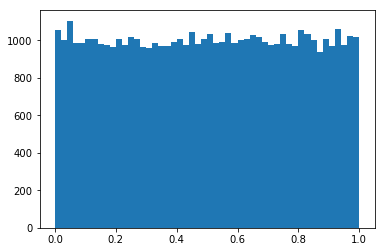

In [18]:
k_s = [1, 2, 3, 5, 10, 50]

for k in k_s:
    points = np.array([])
    for _ in range(k):
        points = np.concatenate((points, np.random.uniform(0.0, 1.0, 1000)), axis=0)
        
    points = np.array(points)
    print points.shape
        
    plt.hist(points, 50)
    plt.show()